In [3]:
import sklearn as sk
import pandas as pd
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

**Import dataset from Kaggle**

In [4]:
train = pd.read_csv("Train.csv")
test= pd.read_csv("Test.csv")

In [5]:
train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Split the training set**

In [6]:
X = train.drop(columns=["Class"])
y= train["Class"]
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y.value_counts()

0    1620
1     143
Name: Class, dtype: int64

**Since the counts are uneven for each category, resampling is needed**

In [8]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state = 1)
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((2592, 1558), (648, 1558), (2592,), (648,))

**Apply Different Machine Learning Algorithms**

**Decision Tree Classifier Algorithm**

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       328
           1       0.93      1.00      0.96       320

    accuracy                           0.96       648
   macro avg       0.96      0.96      0.96       648
weighted avg       0.96      0.96      0.96       648



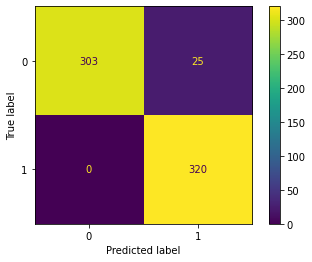

In [9]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(x_test)
score= accuracy_score(y_test,predictions)
score
print(classification_report(y_test,predictions))
plot_confusion_matrix(model, x_test, y_test)

**K Nearest Neighbors**

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       328
           1       0.84      0.93      0.89       320

    accuracy                           0.88       648
   macro avg       0.88      0.88      0.88       648
weighted avg       0.89      0.88      0.88       648



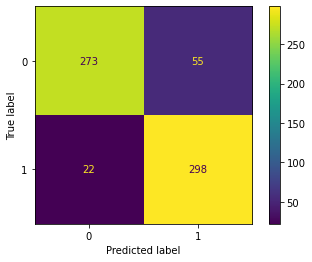

In [10]:
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(x_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(classifier, x_test, y_test)

**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.75      0.95      0.83       328
           1       0.92      0.67      0.78       320

    accuracy                           0.81       648
   macro avg       0.83      0.81      0.80       648
weighted avg       0.83      0.81      0.80       648



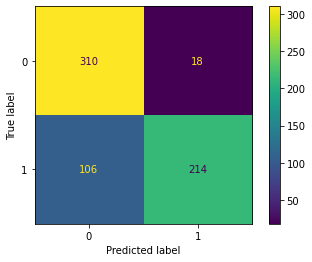

In [11]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred =clf.predict(x_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(clf, x_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       328
           1       0.82      1.00      0.90       320

    accuracy                           0.90       648
   macro avg       0.91      0.90      0.89       648
weighted avg       0.91      0.90      0.89       648



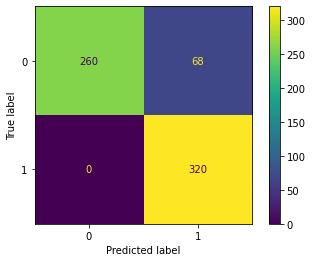

In [12]:
gb = GaussianNB()
gb.fit(X_train,y_train)
y_pred =gb.predict(x_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gb, x_test, y_test)

## Looking at all the recall and precision values of the various machine learning methods, it seem that the Decision Tree Classifier is the best model to use on this dataset ## 